<a href="https://colab.research.google.com/github/georgynio/notebooks-ML/blob/main/Recomendador_musicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/music-clustering/main/Dados/Dados_totais.csv')
dados_generos = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/music-clustering/main/Dados/data_by_genres.csv')
dados_anos = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/music-clustering/main/Dados/data_by_year.csv')



In [ ]:
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

   explicit                      id  instrumentalness  key  liveness  \
0         0  3AJwUDP919kvQ9QcozQPxg          0.000121   11    0.2340   
1         1  0I3q5fE6wg7LIfHGngUTnV          0.000000    4    0.0771   

   loudness  mode         name  popularity  speechiness    tempo  \
0    -7.227     1       Yellow          84       0.0281  173.372   
1    -5.946     0  Ms. Jackson          80       0.2690   94.948   

            artists_song  
0      Coldplay - Yellow  
1  OutKast - Ms. Jackson

In [ ]:
dados['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
dados.shape

(20311, 19)

In [ ]:
dados = dados.drop(['explicit', 'key', 'mode'], axis=1)
dados.head(2)

valence  year  acousticness   artists  danceability  duration_ms  energy  \
0    0.285  2000       0.00239  Coldplay         0.429       266773   0.661   
1    0.613  2000       0.14300   OutKast         0.843       270507   0.806   

                       id  instrumentalness  liveness  loudness         name  \
0  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227       Yellow   
1  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  Ms. Jackson   

   popularity  speechiness    tempo           artists_song  
0          84       0.0281  173.372      Coldplay - Yellow  
1          80       0.2690   94.948  OutKast - Ms. Jackson

In [ ]:
dados.shape

(20311, 16)

In [ ]:
dados.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [ ]:
dados.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [ ]:
dados_generos.head(2)

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834    0.3616 -31.514333     0.040567   75.336500   
1  0.450678          0.477762    0.1310 -16.854000     0.076817  120.285667   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5

In [ ]:
dados_generos = dados_generos.drop(['mode', 'key'], axis=1)


In [ ]:
dados_generos.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [ ]:
dados_generos.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [ ]:
dados_anos.head(2)

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878   0.20571 -17.048667     0.073662  101.531493  0.379327   
1          0.434195   0.24072 -19.275282     0.116655  100.884521  0.535549   

   popularity  key  
0    0.653333    2  
1    0.140845   10

In [ ]:
dados_anos['year'].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [ ]:
dados_anos.shape

(100, 14)

In [ ]:
dados_anos = dados_anos[dados_anos['year']>=2000]
dados_anos['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
dados_anos = dados_anos.drop(['mode', 'key'],axis=1)
dados_anos = dados_anos.reset_index()

In [ ]:
dados_anos

index  year  acousticness  danceability    duration_ms    energy  \
0      79  2000      0.289323      0.590918  242724.642638  0.625413   
1      80  2001      0.286842      0.583318  240307.796010  0.626986   
2      81  2002      0.282624      0.576160  239503.283000  0.641270   
3      82  2003      0.256471      0.575763  244670.575230  0.660165   
4      83  2004      0.280559      0.567680  237378.708037  0.648868   
5      84  2005      0.255764      0.572281  237229.588205  0.653209   
6      85  2006      0.279986      0.568230  234042.914359  0.650326   
7      86  2007      0.254081      0.563414  241049.962564  0.668305   
8      87  2008      0.249192      0.579193  240107.315601  0.671461   
9      88  2009      0.261929      0.564190  238140.013265  0.670749   
10     89  2010      0.242687      0.572488  242811.804563  0.681778   
11     90  2011      0.273183      0.552867  236998.787308  0.648301   
12     91  2012      0.249953      0.570882  245807.457584  0.656571   
13     92  2013      0.257488      0.571148  242267.661437  0.645597   
14     93  2014      0.249313      0.589948  233728.314713  0.648795   
15     94  2015      0.253952      0.593774  230029.046606  0.627064   
16     95  2016      0.284171      0.600202  221396.510295  0.592855   
17     96  2017      0.286099      0.612217  211115.696787  0.590421   
18     97  2018      0.267633      0.663500  206001.007133  0.602435   
19     98  2019      0.278299      0.644814  201024.788096  0.593224   
20     99  2020      0.219931      0.692904  193728.397537  0.631232   

    instrumentalness  liveness  loudness  speechiness       tempo   valence  \
0           0.101168  0.197686 -8.247766     0.089205  118.999323  0.559475   
1           0.107214  0.187026 -8.305095     0.089182  117.765399  0.541479   
2           0.088048  0.193911 -7.686640     0.084308  119.239738  0.542397   
3           0.083049  0.196976 -7.485545     0.093926  120.914622  0.530504   
4           0.077934  0.202199 -7.601655     0.094239  121.290346  0.524489   
5           0.090194  0.190082 -7.466159     0.093334  121.617967  0.532531   
6           0.077701  0.188289 -7.265501     0.085847  121.798615  0.520028   
7           0.072957  0.196127 -7.044536     0.084347  124.087516  0.516794   
8           0.063662  0.198431 -6.843804     0.077356  123.509934  0.527542   
9           0.075872  0.205252 -7.046015     0.085458  123.463808  0.507170   
10          0.082981  0.199701 -6.909904     0.081031  123.570215  0.520895   
11          0.103772  0.203309 -7.574986     0.087479  121.483997  0.472454   
12          0.085206  0.189733 -7.260550     0.081742  121.781736  0.462709   
13          0.098365  0.199631 -7.472039     0.093849  120.806829  0.454741   
14          0.076570  0.191822 -7.067440     0.084061  122.305263  0.463049   
15          0.106787  0.188856 -7.625639     0.096779  120.115411  0.432098   
16          0.093984  0.181170 -8.061056     0.104313  118.652630  0.431532   
17          0.097091  0.191713 -8.312630     0.110536  117.202740  0.416476   
18          0.054217  0.176326 -7.168785     0.127176  121.922308  0.447921   
19          0.077640  0.172616 -7.722192     0.121043  120.235644  0.458818   
20          0.016376  0.178535 -6.595067     0.141384  124.283129  0.501048   

    popularity  
0    46.684049  
1    48.750125  
2    48.655500  
3    48.626407  
4    49.273143  
5    50.953333  
6    51.313846  
7    51.075897  
8    50.630179  
9    51.440816  
10   52.730159  
11   53.307387  
12   52.655013  
13   54.047065  
14   55.543142  
15   56.700608  
16   59.647190  
17   63.263554  
18   63.296243  
19   65.256542  
20   64.301970

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(dados_anos, x='year', y='loudness', markers=True, title='Variação do loudness anual')
fig.show()

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['acousticness'],
                         name='Acousticness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['valence'],
                         name='Valence'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['danceability'],
                         name='Danceability'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['energy'],
                         name='Energy'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['instrumentalness'],
                         name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['liveness'],
                         name='Liveness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['speechiness'],
                         name='Speechness'))

fig.show()

In [ ]:
fig = px.imshow(dados.corr(), text_auto=True)
fig.show()

<ipython-input-24-fa7b692f5384>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
dados_generos

genres  acousticness  danceability   duration_ms  \
0     21st century classical      0.979333      0.162883  1.602977e+05   
1                      432hz      0.494780      0.299333  1.048887e+06   
2                      8-bit      0.762000      0.712000  1.151770e+05   
3                         []      0.651417      0.529093  2.328809e+05   
4                 a cappella      0.676557      0.538961  1.906285e+05   
...                      ...           ...           ...           ...   
2968                    zolo      0.222625      0.547082  2.580991e+05   
2969                 zouglou      0.161000      0.863000  2.063200e+05   
2970                    zouk      0.263261      0.748889  3.060728e+05   
2971            zurich indie      0.993000      0.705667  1.984173e+05   
2972                  zydeco      0.421038      0.629409  1.716717e+05   

        energy  instrumentalness  liveness   loudness  speechiness  \
0     0.071317          0.606834  0.361600 -31.514333     0.040567   
1     0.450678          0.477762  0.131000 -16.854000     0.076817   
2     0.818000          0.876000  0.126000  -9.180000     0.047000   
3     0.419146          0.205309  0.218696 -12.288965     0.107872   
4     0.316434          0.003003  0.172254 -12.479387     0.082851   
...        ...               ...       ...        ...          ...   
2968  0.610240          0.143872  0.204206 -11.295878     0.061088   
2969  0.909000          0.000000  0.108000  -5.985000     0.081300   
2970  0.622444          0.257227  0.089678 -10.289222     0.038778   
2971  0.172667          0.468633  0.179667 -11.453333     0.348667   
2972  0.609369          0.019248  0.255877  -9.854825     0.050491   

           tempo   valence  popularity  
0      75.336500  0.103783   27.833333  
1     120.285667  0.221750   52.500000  
2     133.444000  0.975000   48.000000  
3     112.857352  0.513604   20.859882  
4     112.110362  0.448249   45.820071  
...          ...       ...         ...  
2968  125.494919  0.596155   33.778943  
2969  119.038000  0.845000   58.000000  
2970  101.965222  0.824111   46.666667  
2971   91.278000  0.739000    0.000000  
2972  126.366087  0.808544   30.261905  

[2973 rows x 12 columns]

In [ ]:
dados_generos['genres'].value_counts().sum()

2973

In [ ]:
dados_generos1 = dados_generos.drop('genres', axis=1)
dados_generos1

acousticness  danceability   duration_ms    energy  instrumentalness  \
0         0.979333      0.162883  1.602977e+05  0.071317          0.606834   
1         0.494780      0.299333  1.048887e+06  0.450678          0.477762   
2         0.762000      0.712000  1.151770e+05  0.818000          0.876000   
3         0.651417      0.529093  2.328809e+05  0.419146          0.205309   
4         0.676557      0.538961  1.906285e+05  0.316434          0.003003   
...            ...           ...           ...       ...               ...   
2968      0.222625      0.547082  2.580991e+05  0.610240          0.143872   
2969      0.161000      0.863000  2.063200e+05  0.909000          0.000000   
2970      0.263261      0.748889  3.060728e+05  0.622444          0.257227   
2971      0.993000      0.705667  1.984173e+05  0.172667          0.468633   
2972      0.421038      0.629409  1.716717e+05  0.609369          0.019248   

      liveness   loudness  speechiness       tempo   valence  popularity  
0     0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333  
1     0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000  
2     0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000  
3     0.218696 -12.288965     0.107872  112.857352  0.513604   20.859882  
4     0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071  
...        ...        ...          ...         ...       ...         ...  
2968  0.204206 -11.295878     0.061088  125.494919  0.596155   33.778943  
2969  0.108000  -5.985000     0.081300  119.038000  0.845000   58.000000  
2970  0.089678 -10.289222     0.038778  101.965222  0.824111   46.666667  
2971  0.179667 -11.453333     0.348667   91.278000  0.739000    0.000000  
2972  0.255877  -9.854825     0.050491  126.366087  0.808544   30.261905  

[2973 rows x 11 columns]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
SEED = 1234
np.random.seed(SEED)
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])

In [ ]:
genre_embeding_pca = pca_pipeline.fit_transform(dados_generos1)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embeding_pca)

In [ ]:
projection

x         y
0     5.910268 -0.011146
1     2.787093  4.498483
2    -0.757538 -1.258495
3     1.020521 -0.931690
4     0.753911 -0.999861
...        ...       ...
2968 -0.475136 -0.017126
2969 -3.026756 -1.304983
2970 -0.832511 -1.089726
2971  1.774790 -3.695233
2972 -1.028069 -1.390709

[2973 rows x 2 columns]

In [ ]:
dados_generos

genres  acousticness  danceability   duration_ms  \
0     21st century classical      0.979333      0.162883  1.602977e+05   
1                      432hz      0.494780      0.299333  1.048887e+06   
2                      8-bit      0.762000      0.712000  1.151770e+05   
3                         []      0.651417      0.529093  2.328809e+05   
4                 a cappella      0.676557      0.538961  1.906285e+05   
...                      ...           ...           ...           ...   
2968                    zolo      0.222625      0.547082  2.580991e+05   
2969                 zouglou      0.161000      0.863000  2.063200e+05   
2970                    zouk      0.263261      0.748889  3.060728e+05   
2971            zurich indie      0.993000      0.705667  1.984173e+05   
2972                  zydeco      0.421038      0.629409  1.716717e+05   

        energy  instrumentalness  liveness   loudness  speechiness  \
0     0.071317          0.606834  0.361600 -31.514333     0.040567   
1     0.450678          0.477762  0.131000 -16.854000     0.076817   
2     0.818000          0.876000  0.126000  -9.180000     0.047000   
3     0.419146          0.205309  0.218696 -12.288965     0.107872   
4     0.316434          0.003003  0.172254 -12.479387     0.082851   
...        ...               ...       ...        ...          ...   
2968  0.610240          0.143872  0.204206 -11.295878     0.061088   
2969  0.909000          0.000000  0.108000  -5.985000     0.081300   
2970  0.622444          0.257227  0.089678 -10.289222     0.038778   
2971  0.172667          0.468633  0.179667 -11.453333     0.348667   
2972  0.609369          0.019248  0.255877  -9.854825     0.050491   

           tempo   valence  popularity  
0      75.336500  0.103783   27.833333  
1     120.285667  0.221750   52.500000  
2     133.444000  0.975000   48.000000  
3     112.857352  0.513604   20.859882  
4     112.110362  0.448249   45.820071  
...          ...       ...         ...  
2968  125.494919  0.596155   33.778943  
2969  119.038000  0.845000   58.000000  
2970  101.965222  0.824111   46.666667  
2971   91.278000  0.739000    0.000000  
2972  126.366087  0.808544   30.261905  

[2973 rows x 12 columns]

In [ ]:
dados_generos['genres'].value_counts().sum()

2973

In [ ]:
dados_generos1 = dados_generos.drop('genres', axis=1)
dados_generos1

acousticness  danceability   duration_ms    energy  instrumentalness  \
0         0.979333      0.162883  1.602977e+05  0.071317          0.606834   
1         0.494780      0.299333  1.048887e+06  0.450678          0.477762   
2         0.762000      0.712000  1.151770e+05  0.818000          0.876000   
3         0.651417      0.529093  2.328809e+05  0.419146          0.205309   
4         0.676557      0.538961  1.906285e+05  0.316434          0.003003   
...            ...           ...           ...       ...               ...   
2968      0.222625      0.547082  2.580991e+05  0.610240          0.143872   
2969      0.161000      0.863000  2.063200e+05  0.909000          0.000000   
2970      0.263261      0.748889  3.060728e+05  0.622444          0.257227   
2971      0.993000      0.705667  1.984173e+05  0.172667          0.468633   
2972      0.421038      0.629409  1.716717e+05  0.609369          0.019248   

      liveness   loudness  speechiness       tempo   valence  popularity  
0     0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333  
1     0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000  
2     0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000  
3     0.218696 -12.288965     0.107872  112.857352  0.513604   20.859882  
4     0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071  
...        ...        ...          ...         ...       ...         ...  
2968  0.204206 -11.295878     0.061088  125.494919  0.596155   33.778943  
2969  0.108000  -5.985000     0.081300  119.038000  0.845000   58.000000  
2970  0.089678 -10.289222     0.038778  101.965222  0.824111   46.666667  
2971  0.179667 -11.453333     0.348667   91.278000  0.739000    0.000000  
2972  0.255877  -9.854825     0.050491  126.366087  0.808544   30.261905  

[2973 rows x 11 columns]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
SEED = 1224
np.random.seed(1224)
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])

In [ ]:
genre_embedding_pca = pca_pipeline.fit_transform(dados_generos1)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)

In [ ]:
projection

x         y
0     5.910268 -0.011146
1     2.787093  4.498483
2    -0.757538 -1.258495
3     1.020521 -0.931690
4     0.753911 -0.999861
...        ...       ...
2968 -0.475136 -0.017126
2969 -3.026756 -1.304983
2970 -0.832511 -1.089726
2971  1.774790 -3.695233
2972 -1.028069 -1.390709

[2973 rows x 2 columns]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
SEED=1224
np.random.seed(SEED)
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)
kmeans_pca.fit(projection)

dados_generos['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 4523.567815543692.
Iteration 1, inertia 3668.985552156021.
Iteration 2, inertia 3624.730925711817.
Iteration 3, inertia 3602.4958137588164.
Iteration 4, inertia 3588.060791240483.
Iteration 5, inertia 3575.4395702592997.
Iteration 6, inertia 3566.376131163018.
Iteration 7, inertia 3562.5917284574916.
Iteration 8, inertia 3560.314467700933.
Iteration 9, inertia 3558.8854951526473.
Iteration 10, inertia 3558.0027489340505.
Iteration 11, inertia 3557.7295547754866.
Converged at iteration 11: center shift 9.319981044865404e-05 within tolerance 0.0002709886847099649.
Initialization complete
Iteration 0, inertia 3650.516684764648.
Iteration 1, inertia 3552.8915365648145.
Iteration 2, inertia 3528.9425421232227.
Iteration 3, inertia 3518.849132048709.
Iteration 4, inertia 3512.671791613977.
Iteration 5, inertia 3509.1741078247437.
Iteration 6, inertia 3506.3883335513733.
Iteration 7, inertia 3505.091074309408.
Iteration 8, inertia 3504.646511738492

In [ ]:
projection

x         y  cluster_pca
0     5.910268 -0.011146            3
1     2.787093  4.498483            3
2    -0.757538 -1.258495            4
3     1.020521 -0.931690            1
4     0.753911 -0.999861            1
...        ...       ...          ...
2968 -0.475136 -0.017126            2
2969 -3.026756 -1.304983            4
2970 -0.832511 -1.089726            4
2971  1.774790 -3.695233            1
2972 -1.028069 -1.390709            4

[2973 rows x 3 columns]

In [ ]:
projection['generos'] = dados_generos['genres']
projection

x         y  cluster_pca                 generos
0     5.910268 -0.011146            3  21st century classical
1     2.787093  4.498483            3                   432hz
2    -0.757538 -1.258495            4                   8-bit
3     1.020521 -0.931690            1                      []
4     0.753911 -0.999861            1              a cappella
...        ...       ...          ...                     ...
2968 -0.475136 -0.017126            2                    zolo
2969 -3.026756 -1.304983            4                 zouglou
2970 -0.832511 -1.089726            4                    zouk
2971  1.774790 -3.695233            1            zurich indie
2972 -1.028069 -1.390709            4                  zydeco

[2973 rows x 4 columns]

In [ ]:
fig = px.scatter(
    projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos']
)
fig.show()

In [ ]:
#percentual de explicação
pca_pipeline[1].explained_variance_ratio_.sum()

0.4927066994726641

In [ ]:
# quantidade de colunas explicadas
pca_pipeline[1].explained_variance_.sum()

5.421597305805697

# Clusterização por musica

In [ ]:
dados.head()

valence  year  acousticness       artists  danceability  duration_ms  \
0    0.285  2000       0.00239      Coldplay         0.429       266773   
1    0.613  2000       0.14300       OutKast         0.843       270507   
2    0.400  2000       0.00958   Linkin Park         0.556       216880   
3    0.543  2000       0.00664  3 Doors Down         0.545       233933   
4    0.760  2000       0.03020        Eminem         0.949       284200   

   energy                      id  instrumentalness  liveness  loudness  \
0   0.661  3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227   
1   0.806  0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946   
2   0.864  60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870   
3   0.865  6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708   
4   0.661  3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244   

                  name  popularity  speechiness    tempo  \
0               Yellow          84       0.0281  173.372   
1          Ms. Jackson          80       0.2690   94.948   
2           In the End          84       0.0584  105.143   
3           Kryptonite          78       0.0286   99.009   
4  The Real Slim Shady          80       0.0572  104.504   

                   artists_song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady

In [ ]:
dados['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [ ]:
dados['artists_song'].value_counts()

Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()
dados2 = dados.drop('artists', axis=1)

dados_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies

valence  year  acousticness  danceability  duration_ms  energy  \
0        0.285  2000       0.00239         0.429       266773   0.661   
1        0.613  2000       0.14300         0.843       270507   0.806   
2        0.400  2000       0.00958         0.556       216880   0.864   
3        0.543  2000       0.00664         0.545       233933   0.865   
4        0.760  2000       0.03020         0.949       284200   0.661   
...        ...   ...           ...           ...          ...     ...   
20306    0.187  2020       0.57400         0.445       176250   0.330   
20307    0.240  2020       0.81500         0.467       179188   0.429   
20308    0.466  2020       0.31000         0.562       253613   0.686   
20309    0.522  2020       0.20400         0.598       230600   0.472   
20310    0.195  2020       0.00998         0.671       337147   0.623   

                           id  instrumentalness  liveness  loudness  ...  \
0      3AJwUDP919kvQ9QcozQPxg          0.000121    0.2340    -7.227  ...   
1      0I3q5fE6wg7LIfHGngUTnV          0.000000    0.0771    -5.946  ...   
2      60a0Rd6pjrkxjPbaKzXjfq          0.000000    0.2090    -5.870  ...   
3      6ZOBP3NvffbU4SZcrnt1k6          0.000011    0.1680    -5.708  ...   
4      3yfqSUWxFvZELEM4PmlwIR          0.000000    0.0454    -4.244  ...   
...                       ...               ...       ...       ...  ...   
20306  0PUkanqCGTb6qseXPKOw1F          0.000000    0.1020    -8.121  ...   
20307  6Iw6fQVKZi0fWtEQBrTFcP          0.000052    0.1770    -8.689  ...   
20308  308prODCCD0O660tIktbUi          0.022500    0.1250    -8.480  ...   
20309  2f8y4CuG57UJEmkG3ujd0D          0.000015    0.1080   -10.991  ...   
20310  5SiZJoLXp3WOl3J4C8IK0d          0.000008    0.6430    -7.161  ...   

      artists_Zara Larsson  artists_Zedd  artists_alt-J  artists_blackbear  \
0                        0             0              0                  0   
1                        0             0              0                  0   
2                        0             0              0                  0   
3                        0             0              0                  0   
4                        0             0              0                  0   
...                    ...           ...            ...                ...   
20306                    0             0              0                  0   
20307                    0             0              0                  0   
20308                    0             0              0                  0   
20309                    0             0              0                  0   
20310                    0             0              0                  0   

      artists_blink-182  artists_deadmau5  artists_for KING & COUNTRY  \
0                     0                 0                           0   
1                     0                 0                           0   
2                     0                 0                           0   
3                     0                 0                           0   
4                     0                 0                           0   
...                 ...               ...                         ...   
20306                 0                 0                           0   
20307                 0                 0                           0   
20308                 0                 0                           0   
20309                 0                 0                           0   
20310                 0                 0                           0   

       artists_fun.  artists_girl in red  artists_iann dior  
0                 0                    0                  0  
1                 0                    0                  0  
2                 0                    0                  0  
3                 0                    0                  0  
4                 0                    0                  0  
...             ...            

In [ ]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])



music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id', 'name', 'artists_song'], axis=1))
projection_m = pd.DataFrame(data=music_embedding_pca) # não precisa colocar as colunas porque não sabemos quantas colunas são


In [ ]:
pca_pipeline[1].n_components_

612

In [ ]:
kmeans_pca_pipeline = KMeans(n_clusters=50, verbose=True, random_state=SEED)

kmeans_pca_pipeline.fit(projection_m)
dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 11963028.327028442.
Iteration 1, inertia 11585783.317175549.
Iteration 2, inertia 11579851.814906854.
Iteration 3, inertia 11578249.927130893.
Iteration 4, inertia 11577374.465640193.
Iteration 5, inertia 11576783.35184339.
Iteration 6, inertia 11576276.738136131.
Iteration 7, inertia 11575969.702026729.
Iteration 8, inertia 11575759.68757338.
Iteration 9, inertia 11575648.913091512.
Iteration 10, inertia 11575580.606731346.
Iteration 11, inertia 11575513.724195115.
Iteration 12, inertia 11575443.592775118.
Iteration 13, inertia 11575411.446904957.
Iteration 14, inertia 11575398.853621032.
Iteration 15, inertia 11575390.85730725.
Iteration 16, inertia 11575387.004294656.
Iteration 17, inertia 11575385.065931987.
Iteration 18, inertia 11575383.364708211.
Iteration 19, inertia 11575382.256231848.
Converged at iteration 19: center shift 2.8981679123012857e-05 within tolerance 0.00010145437102691005.
Initialization complete
Iteration 0, inertia 

In [ ]:
projection_m['artist'] = dados['artists']
projection_m['song'] = dados['artists_song']

In [ ]:
projection_m

0         1         2         3         4         5         6  \
0      0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1     -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2     -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3     -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4     -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   
...         ...       ...       ...       ...       ...       ...       ...   
20306  1.346699 -2.775889  0.986755 -1.704967  0.103935 -0.726582  0.253808   
20307  1.269387 -2.444619  0.971408 -0.115303 -0.719597 -1.823579 -0.545186   
20308  0.781916 -1.164865  0.705256 -0.947160  1.145828 -0.472667 -0.356604   
20309  0.002454 -3.056407 -0.272934  1.436355 -0.604453  0.251492 -1.361710   
20310 -0.957008 -1.208016  1.103144  4.128170  1.026126  0.085505  1.588383   

              7         8         9  ...       605       606       607  \
0     -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027   
1      0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322   
2      1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979   
3      1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148   
4      0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478   
...         ...       ...       ...  ...       ...       ...       ...   
20306  0.520234 -0.064513  0.204971  ... -0.235355 -0.054256  0.016922   
20307 -1.475719 -0.338390  0.272129  ... -0.183026  0.074605  0.005622   
20308  0.972512  0.900317 -0.674016  ... -0.033420 -0.157564  0.213849   
20309 -0.633245  0.280076  0.521145  ... -0.784640  0.080684  0.038379   
20310  0.567041 -1.026283  0.266124  ... -0.012069 -0.003818 -0.017675   

            608           609           610           611  cluster_pca  \
0     -0.032617  2.241192e-11  1.202033e-13  3.177821e-12            5   
1     -0.030234 -2.395758e-12  2.291641e-13 -1.187264e-12           12   
2     -0.012781  4.273933e-12 -6.407207e-13 -1.958694e-13           20   
3     -0.040911  5.152080e-11 -7.249490e-13  1.084807e-11           12   
4     -0.010033  2.254040e-12  1.683896e-13  8.389616e-13           12   
...         ...           ...           ...           ...          ...   
20306 -0.125947  4.217717e-11 -4.175589e-13  5.457610e-11           30   
20307  0.000054  4.323403e-11  1.154738e-11  9.481307e-12           30   
20308 -0.065180 -2.580928e-11  9.953739e-12  4.430351e-11           30   
20309  0.108493  5.473520e-11  1.333316e-11  1.185832e-11           30   
20310 -0.010372  2.372825e-12  1.582875e-13  8.373194e-13           30   

              artist                                song  
0           Coldplay                   Coldplay - Yellow  
1            OutKast               OutKast - Ms. Jackson  
2        Linkin Park            Linkin Park - In the End  
3       3 Doors Down           3 Doors Down - Kryptonite  
4             Eminem        Eminem - The Real Slim Shady  
...              ...                                 ...  
20306          Bazzi      Bazzi - I Don't Think I'm Okay  
20307  Bryson Tiller  Bryson Tiller - Timeless Interlude  
20308    Fleet Foxes              Fleet Foxes - Sunblind  
20309          Gunna      Gunna - NASTY GIRL / ON CAMERA  
20310         Eminem                   Eminem - Darkness  

[20311 rows x 615 columns]

In [ ]:
fig = px.scatter_3d(
    # as primeiras colunas são as que mais explicam o pca
    projection_m, x=0, y=1, z=2, color='cluster_pca', hover_data=['song']
)
fig.update_traces(marker_size=2)
fig.show()

In [ ]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.7000008463187031

In [ ]:
pca_pipeline[1].explained_variance_.sum()

620.9313218688688

# Recomendação de musica

In [ ]:
nome_musica = 'Ed Sheeran - Shape of You'


In [ ]:
projection_m.head()

0         1         2         3         4         5         6  \
0  0.174796  0.731252  2.186797 -0.767192  0.594847  0.315968 -0.412322   
1 -1.358420  0.052935 -1.789973  1.938444  0.403606  1.023898 -1.172118   
2 -0.972077  0.658094  0.757500 -0.277350 -0.400393  0.402941  1.292960   
3 -0.926464  1.292091  0.398499 -0.997738  0.202219  0.620859 -0.527689   
4 -1.710077 -0.383502 -1.258562  1.346428  1.223591  1.744579  0.094311   

          7         8         9  ...       605       606       607       608  \
0 -0.479171 -2.700668  2.109956  ... -0.009111  0.005154 -0.034027 -0.032617   
1  0.821698 -1.716897  0.252498  ... -0.031986  0.029708 -0.016322 -0.030234   
2  1.839192 -1.562236  1.410677  ...  0.017097  0.017361 -0.010979 -0.012781   
3  1.135529 -1.343893  1.020964  ...  0.089337  0.164777 -0.064148 -0.040911   
4  0.479412 -2.125376  0.389565  ... -0.011937 -0.004081 -0.017478 -0.010033   

            609           610           611  cluster_pca        artist  \
0  2.241192e-11  1.202033e-13  3.177821e-12            5      Coldplay   
1 -2.395758e-12  2.291641e-13 -1.187264e-12           12       OutKast   
2  4.273933e-12 -6.407207e-13 -1.958694e-13           20   Linkin Park   
3  5.152080e-11 -7.249490e-13  1.084807e-11           12  3 Doors Down   
4  2.254040e-12  1.683896e-13  8.389616e-13           12        Eminem   

                           song  
0             Coldplay - Yellow  
1         OutKast - Ms. Jackson  
2      Linkin Park - In the End  
3     3 Doors Down - Kryptonite  
4  Eminem - The Real Slim Shady  

[5 rows x 615 columns]

In [ ]:
from pandas.core.dtypes.cast import maybe_upcast
from sklearn.metrics.pairwise import euclidean_distances

cluster = list(projection_m[projection_m['song']==nome_musica]['cluster_pca'])[0]
musicas_recomendadas = projection_m[projection_m['cluster_pca']==cluster][[0, 1, 'song']]
x_musica = list(projection_m[projection_m['song']==nome_musica][0])[0]
y_musica = list(projection_m[projection_m['song']==nome_musica][1])[0]

# distacias euclidianas
distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias'] = distancias
recomendada = musicas_recomendadas.sort_values('distancias').head(10)
recomendada

0         1                                               song  \
2463  -0.826954 -2.939691                          Ed Sheeran - Shape of You   
13421 -0.826575 -2.915302                    $uicideBoy$ - For the Last Time   
2942  -0.863727 -2.965997                 Marshmello - Be Kind (with Halsey)   
5371  -0.874338 -2.927113            The Kid LAROI - WRONG (feat. Lil Mosey)   
13682 -0.878031 -2.944654    YoungBoy Never Broke Again - House Arrest Tingz   
15392 -0.792012 -2.987829                         $uicideBoy$ - Putrid Pride   
15388 -0.784530 -2.897926    Pop Smoke - Paranoia (feat. Gunna & Young Thug)   
5271  -0.789801 -2.986457  Ed Sheeran - South of the Border (feat. Camila...   
18479 -0.904140 -2.933036                                    21 Savage - 1.5   
2660  -0.869469 -3.011060                        Tyga - Taste (feat. Offset)   

                           id  distancias  
2463   7qiZfU4dY1lWllzX7mPBI3    0.000000  
13421  240audWazVjwvwh7XwfSZE    0.024393  
2942   3Z8FwOEN59mRMxDCtb8N0A    0.045213  
5371   1EWkw4Fa6IlnsAihLUlFFM    0.049025  
13682  4Boj4bBiDv6Ur1zKEvLXBI    0.051317  
15392  4CwA4CdTQqNv18QSAW3Srk    0.059483  
15388  3QqJ44HiM84iyZS0G2IKIP    0.059533  
5271   4vUmTMuQqjdnvlZmAH61Qk    0.059728  
18479  2wOXxtHZgRkkrkEbKLzzqs    0.077472  
2660   5IaHrVsrferBYDm0bDyABy    0.083072

# Nueva sección

In [ ]:
projection_m[projection_m['song']==nome_musica]['cluster_pca']

2463    30
Name: cluster_pca, dtype: int32

Spotify for Develpores

In [ ]:
!pip install spotipy

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

In [ ]:
scope = 'user-library playlist-modify-private'
OAuth = SpotifyOAuth(
    scope=scope,
    redirect_uri='http://localhost:5000/callback',
    client_id='187dc3fa8fc442aebac477844abcf56d',
    client_secret='51e15a3059334dca9515d764fe80d70d'
)

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id='187dc3fa8fc442aebac477844abcf56d',
    client_secret='51e15a3059334dca9515d764fe80d70d')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

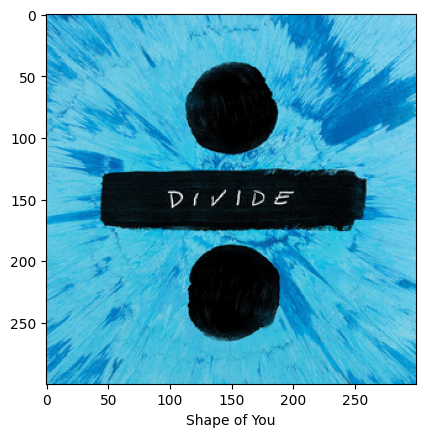

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

#achando o id
nome_musica = 'Ed Sheeran - Shape of You'
id = dados[dados['artists_song']==nome_musica]['id'].iloc[0]

# requisição no api
track = sp.track(id)
url = track['album']['images'][1]['url']
name = track['name']

# mexendo na imagem
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name)
plt.show()

In [ ]:
def recommend_id(playlist_id):
    url = []
    name = []
    artists = []
    duracao = []
    for i in playlist_id:
        track = sp.track(i)
        url.append(track['album']['images'][1]['url'])
        name.append(track['name'])
        artists.append(track['artists'][0]['name'])
        duracao.append(round(track['duration_ms']/60000,2))
    return name, url, artists, duracao



In [ ]:
name, url, artists, duracao = recommend_id(recomendada['id'])

In [ ]:
def vizualize_songs(name, url):
    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url)//columns + 1, columns, i+1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color='w', fontsize=0.1)
        plt.yticks(color='w', fontsize=0.1)
        plt.tick_params(bottom=False)
        plt.xlabel(name[i], fontsize=8)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=False)
    plt.show()


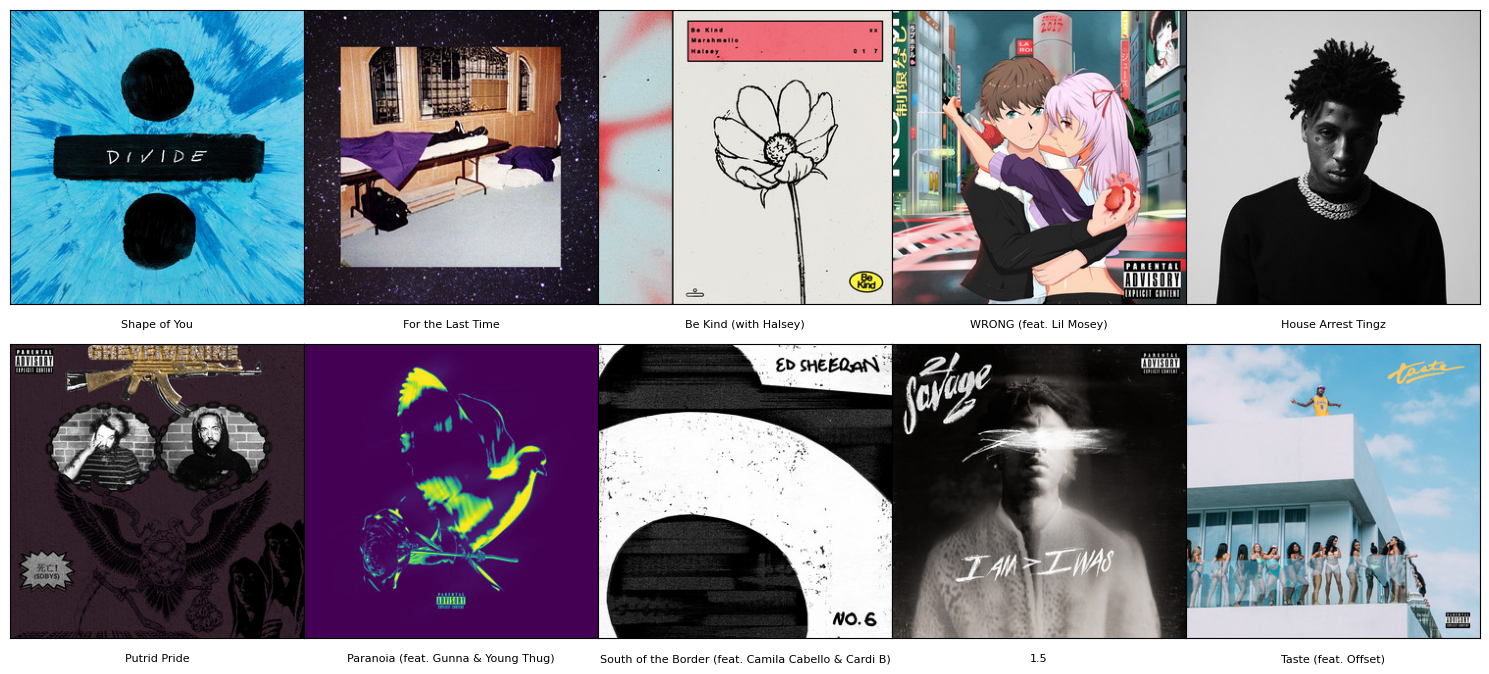

In [ ]:
vizualize_songs(name, url)

# Função final

In [ ]:
def recomendador(nome_musica):
    cluster = list(projection_m[projection_m['song']==nome_musica]['cluster_pca'])[0]
    musicas_recomendadas = projection_m[projection_m['cluster_pca']==cluster][[0, 1, 'song']]
    x_musica = list(projection_m[projection_m['song']==nome_musica][0])[0]
    y_musica = list(projection_m[projection_m['song']==nome_musica][1])[0]
    distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
    musicas_recomendadas['id'] = dados['id']
    musicas_recomendadas['distancias'] = distancias
    recomendada = musicas_recomendadas.sort_values('distancias').head(10)
    playlist_id = recomendada['id']
    name = []
    url = []
    for i in playlist_id:
        track = sp.track(i)
        url.append(track['album']['images'][1]['url'])
        name.append(track['name'])
    vizualize_songs(name, url)

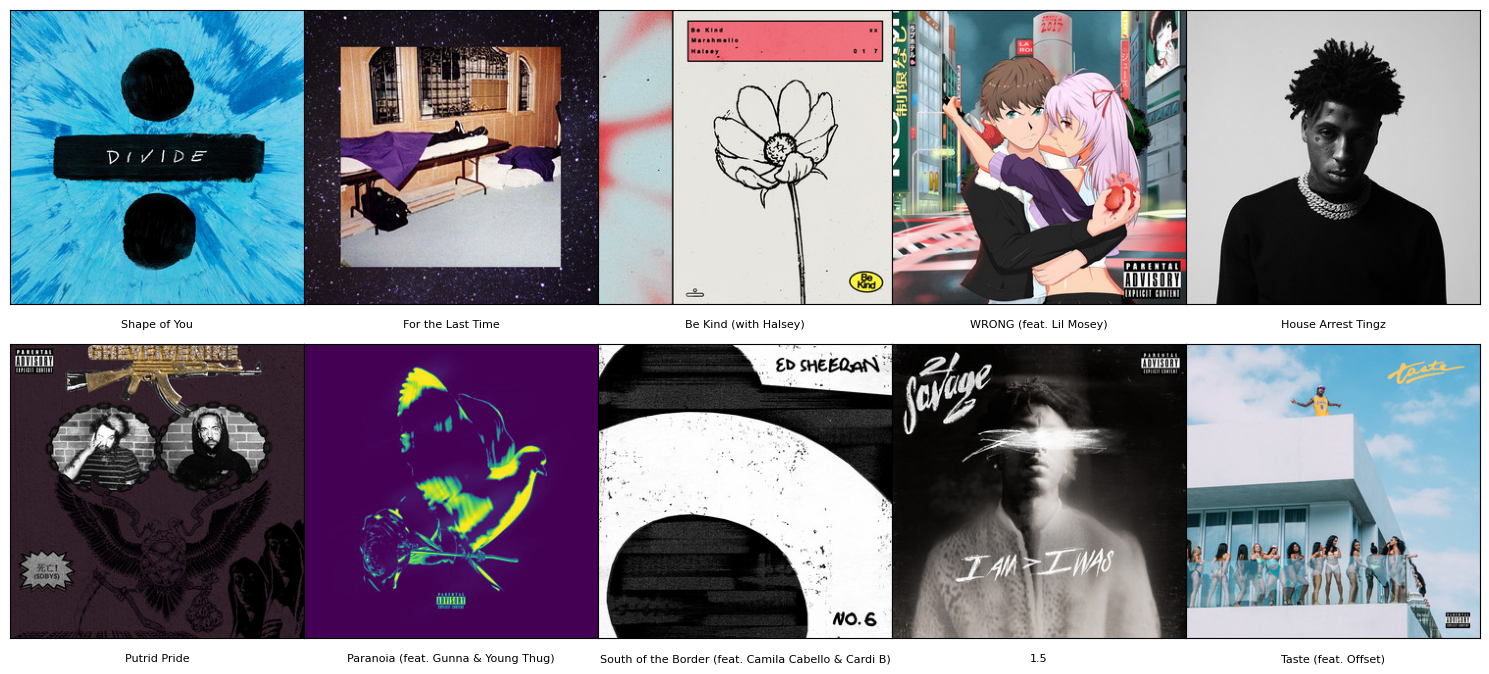

In [ ]:
recomendador('Ed Sheeran - Shape of You')

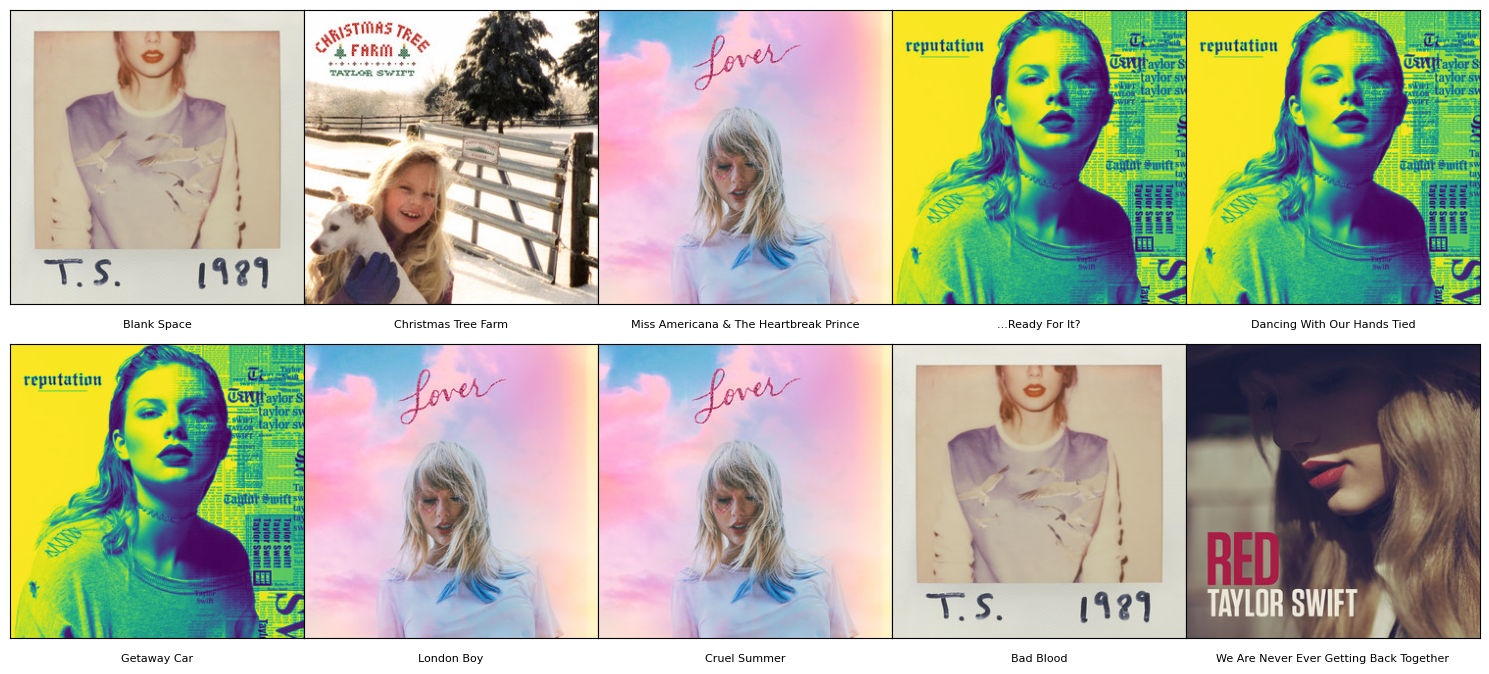

In [ ]:
recomendador('Taylor Swift - Blank Space')

# Nueva sección